In [ ]:
pip install pandas textblob nltk matplotlib


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


In [7]:
print(df.columns)


Index(['productAsin', 'country', 'date', 'isVerified', 'ratingScore',
       'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)


print("Columns in the DataFrame:", df.columns)


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)  


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


print(train_df.head())
print(test_df.head())


Columns in the DataFrame: Index(['productAsin', 'country', 'date', 'isVerified', 'ratingScore',
       'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'],
      dtype='object')
     productAsin        country        date  isVerified  ratingScore  \
2162  B09G9D8KRQ          India  22-10-2023        True            5   
1237  B0BDK8LKPJ          India  26-07-2023        True            5   
1903  B0BN72MLT2  United States  27-04-2024        True            1   
1277  B0BDK8LKPJ          India  11-07-2023        True            4   
1432  B0BDK8LKPJ          India  20-07-2023        True            1   

                                        reviewTitle  \
2162  Perfect I am first time user really loving it   
1237                              As always Awesome   
1903          Scam - phone not able to be activated   
1277                                      Good deal   
1432                                   Worst camera   

              

Missing values in each column:
productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
sentiment             0
dtype: int64


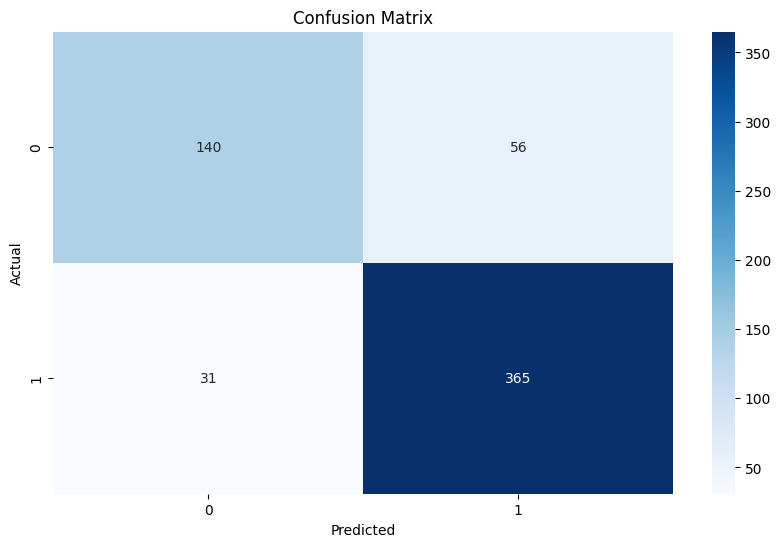

Accuracy: 85.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       196
           1       0.87      0.92      0.89       396

    accuracy                           0.85       592
   macro avg       0.84      0.82      0.83       592
weighted avg       0.85      0.85      0.85       592



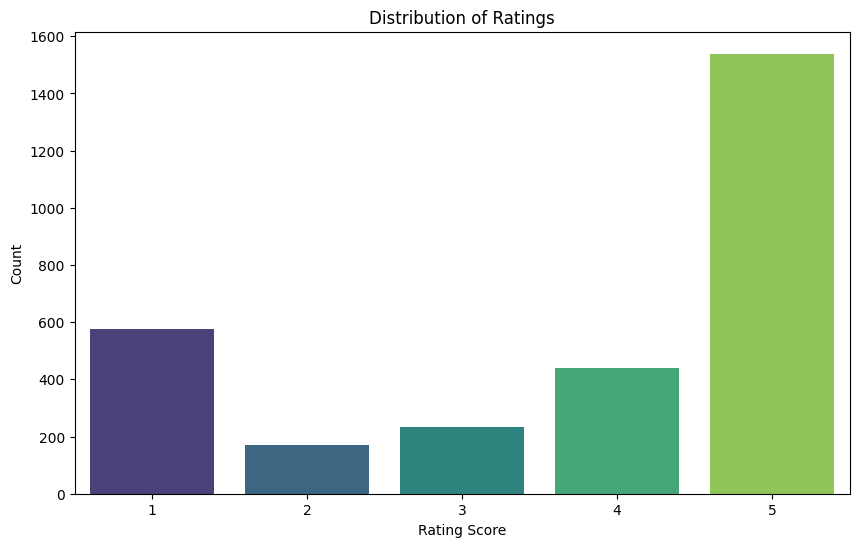

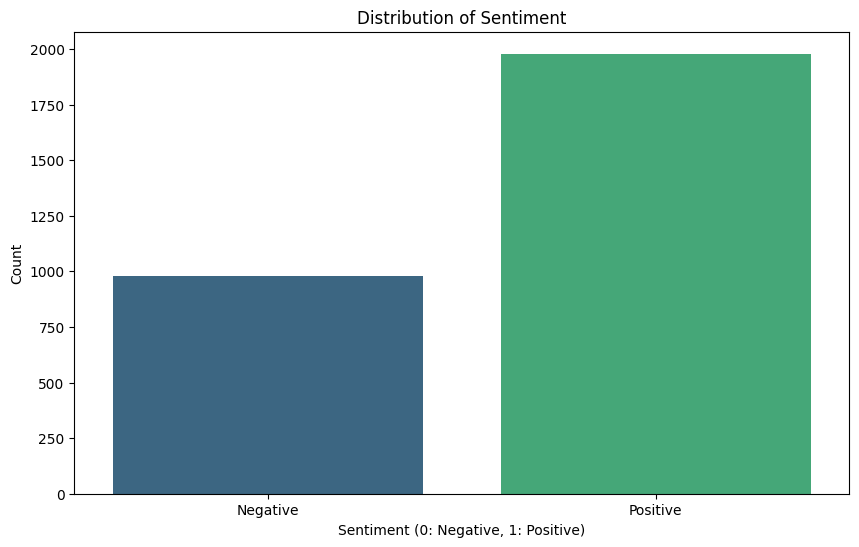

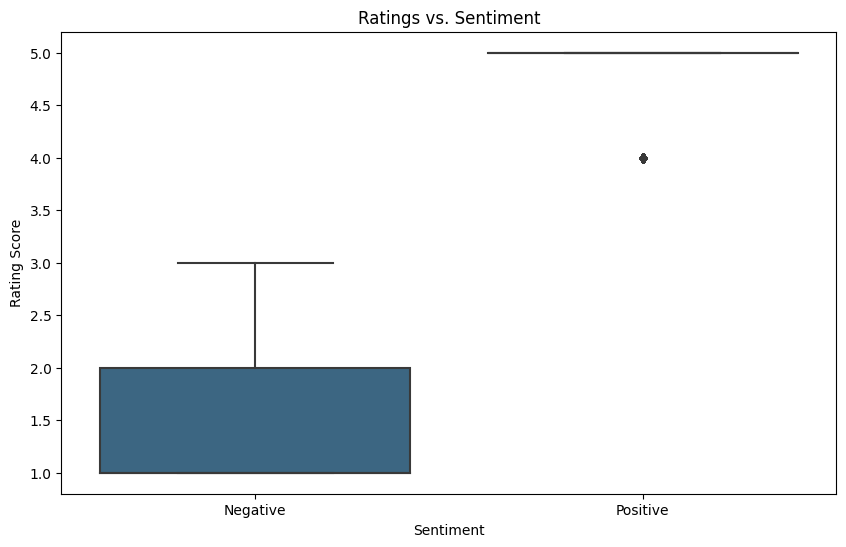

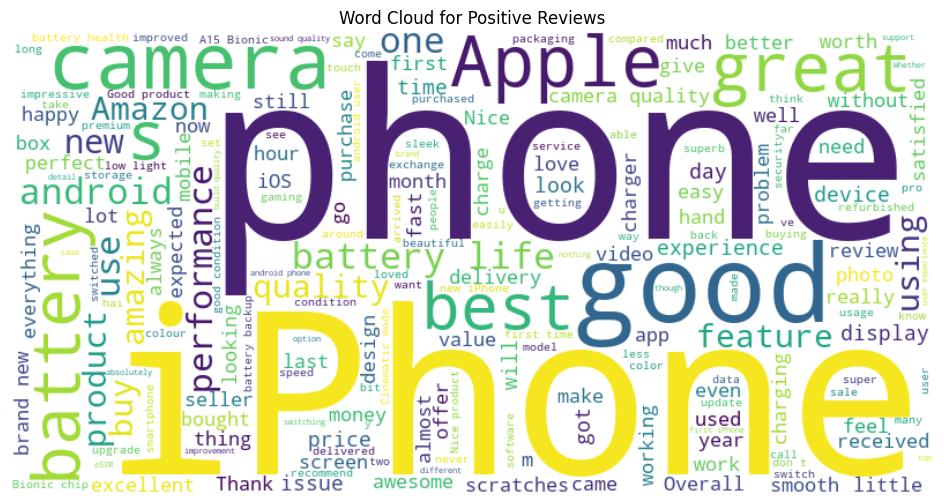

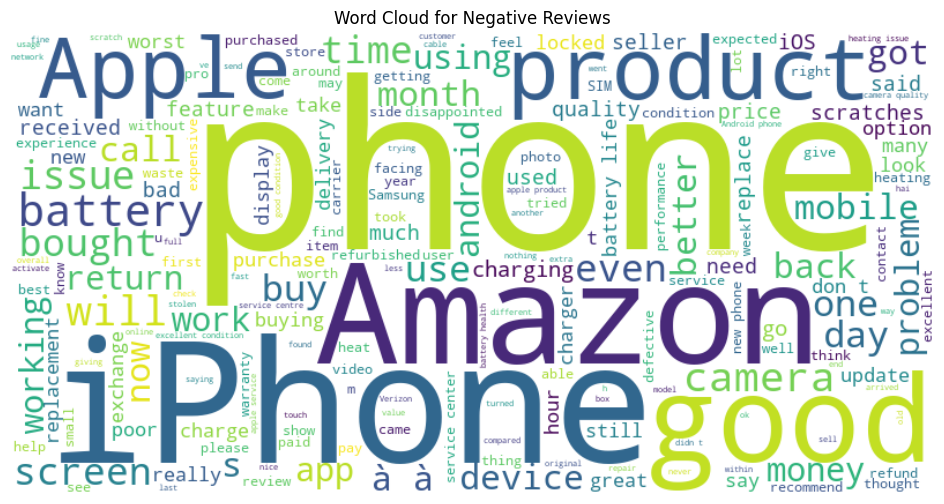

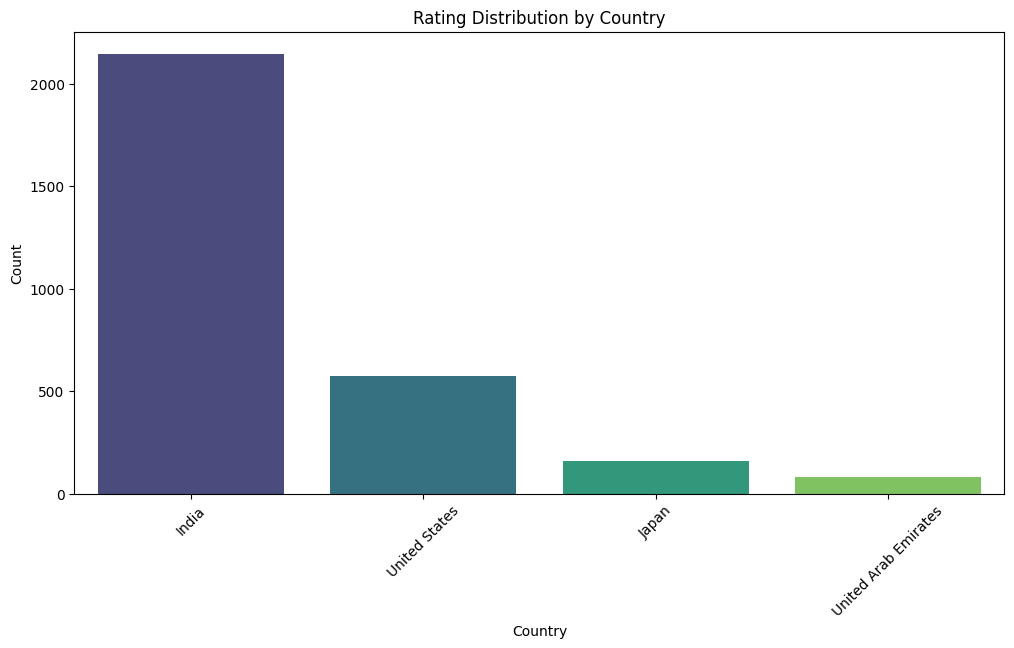

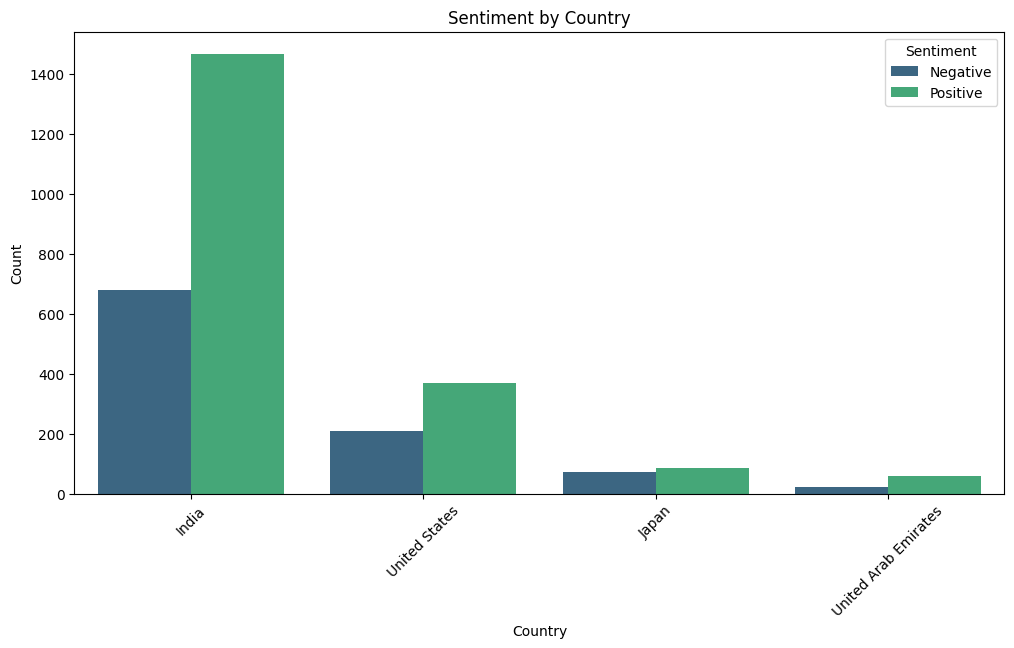

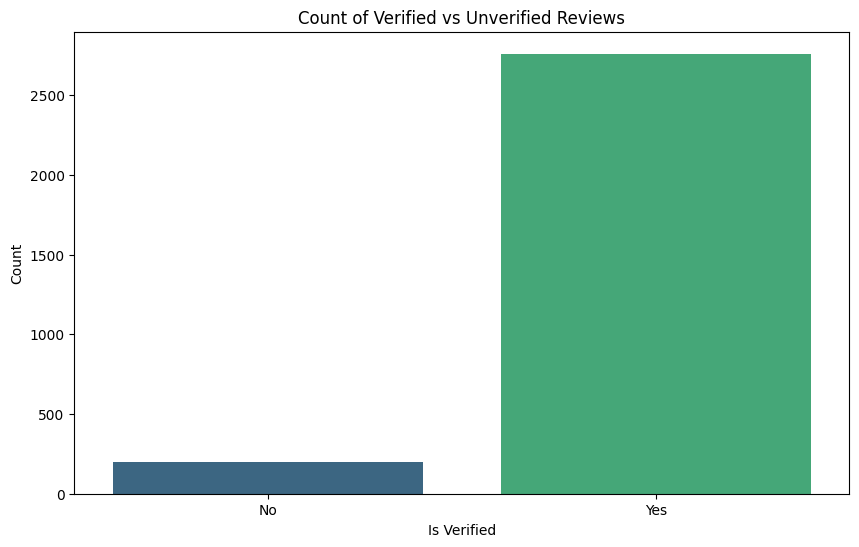

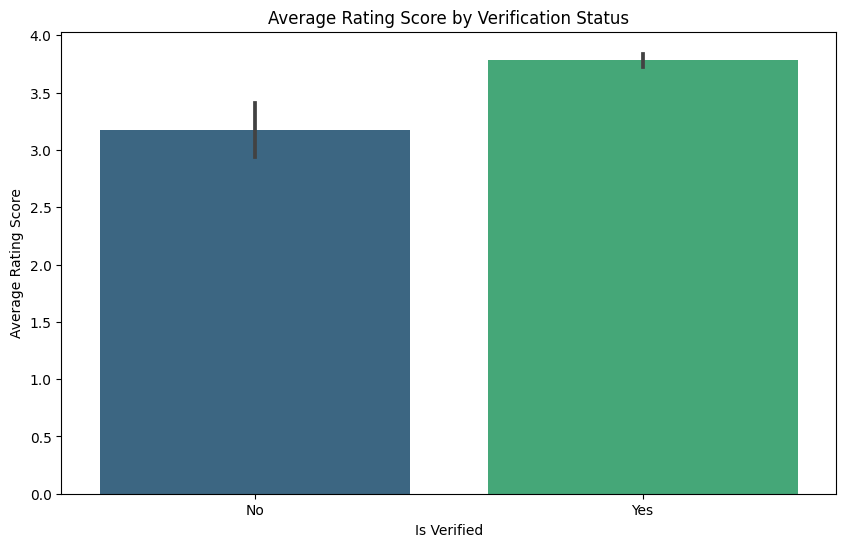

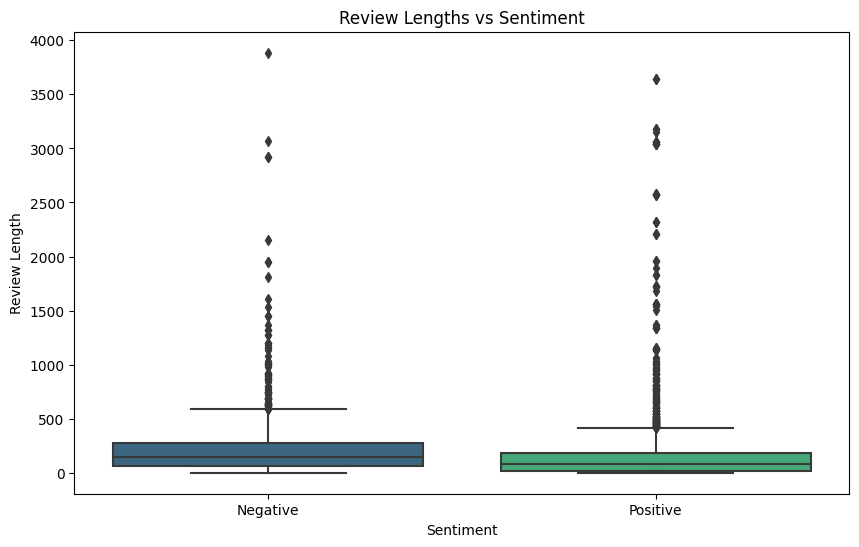

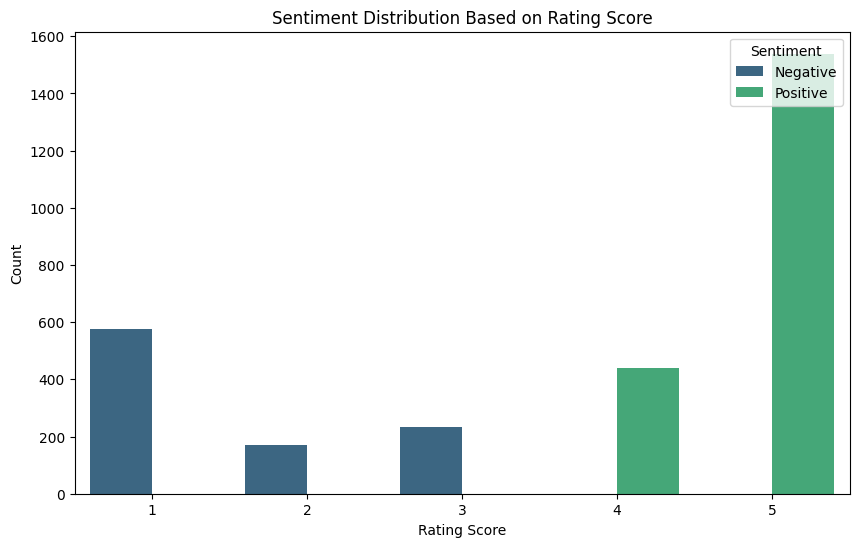

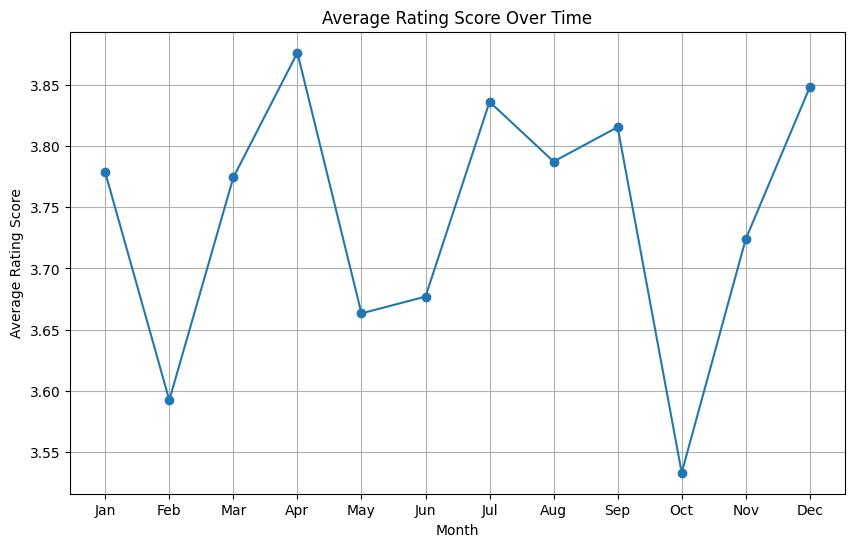

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


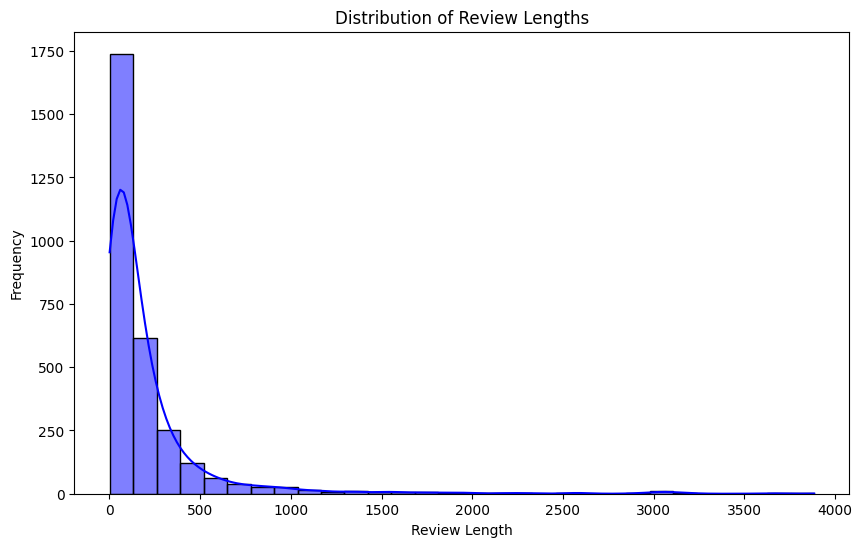

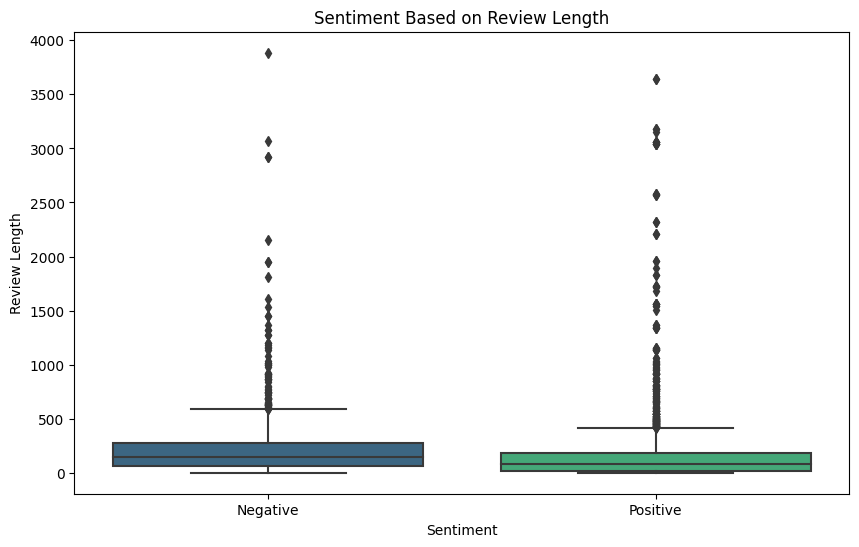

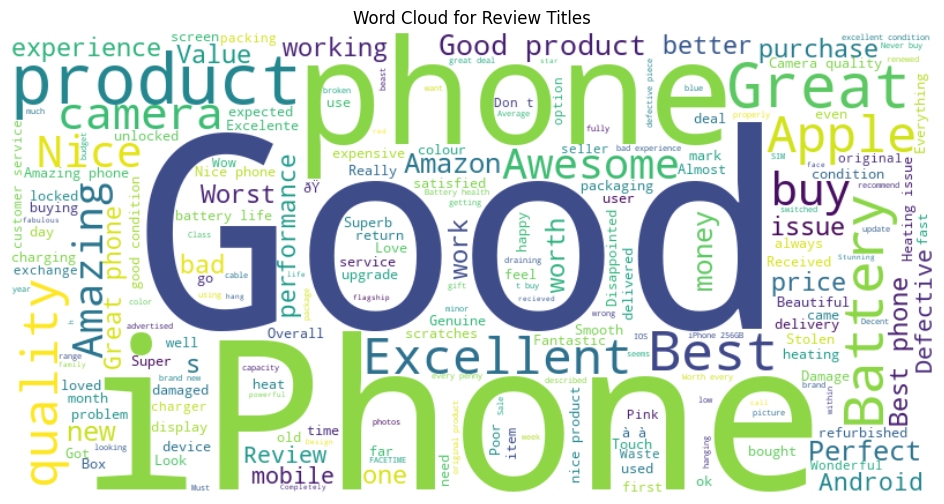

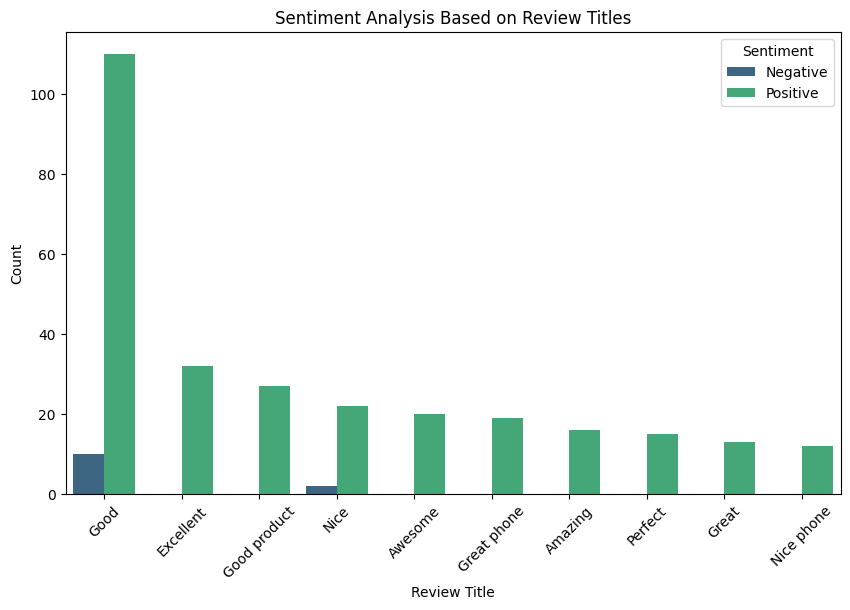

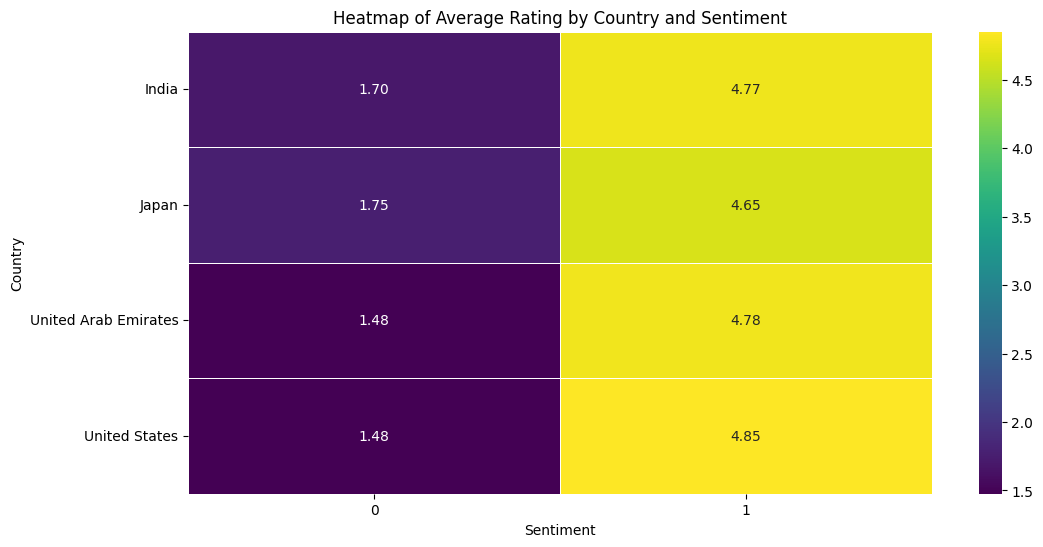

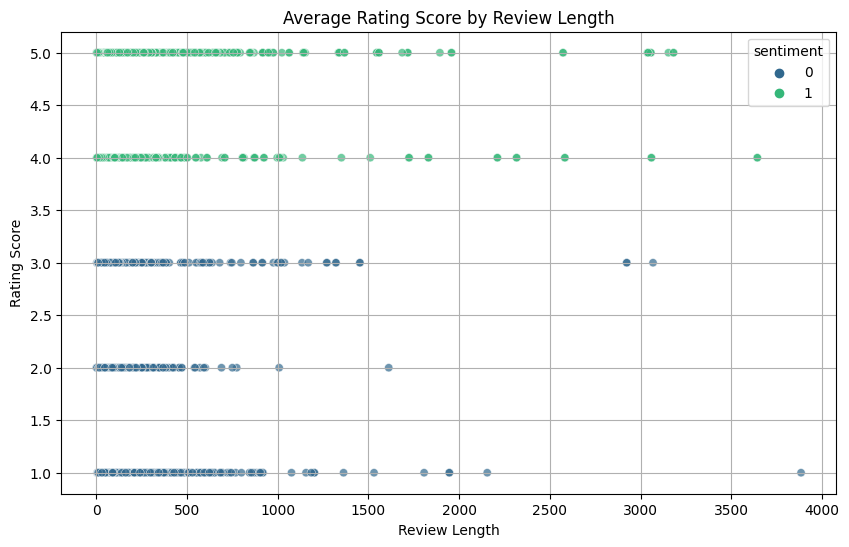

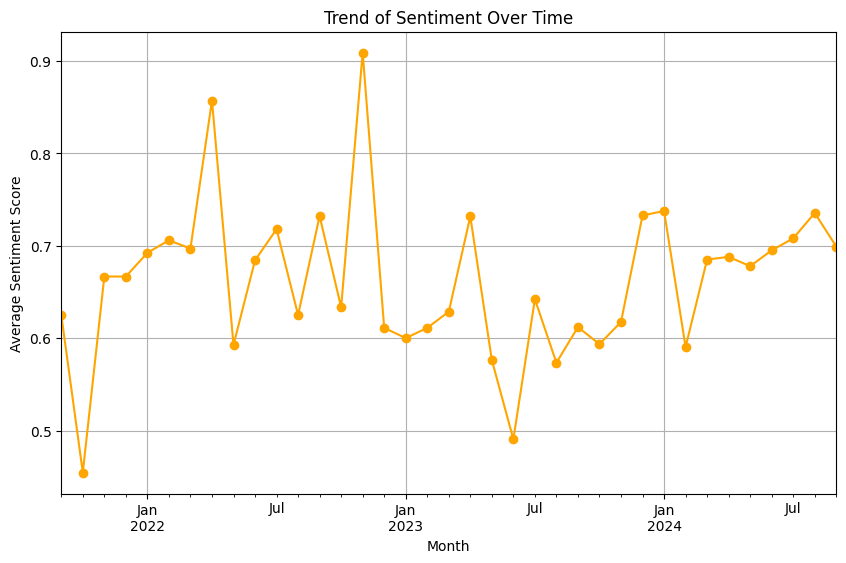

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)  


print("Missing values in each column:")
print(df.isnull().sum())


df.dropna(inplace=True)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(train_df['reviewDescription'])
X_test_vectorized = vectorizer.transform(test_df['reviewDescription'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']


model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Make predictions
test_predictions = model.predict(X_test_vectorized)


test_df['predictions'] = test_predictions


plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(test_df['sentiment'], test_df['predictions']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


accuracy = accuracy_score(test_df['sentiment'], test_df['predictions'])
print(f'Accuracy: {accuracy * 100:.2f}%')


print("Classification Report:")
print(classification_report(test_df['sentiment'], test_df['predictions']))




plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ratingScore', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='ratingScore', palette='viridis')
plt.title('Ratings vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating Score')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


positive_reviews = df[df['sentiment'] == 1]['reviewDescription']
positive_text = " ".join(positive_reviews)
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


negative_reviews = df[df['sentiment'] == 0]['reviewDescription']
negative_text = " ".join(negative_reviews)
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', palette='viridis', order=df['country'].value_counts().index)
plt.title('Rating Distribution by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', hue='sentiment', palette='viridis', order=df['country'].value_counts().index)
plt.title('Sentiment by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='isVerified', palette='viridis')
plt.title('Count of Verified vs Unverified Reviews')
plt.xlabel('Is Verified')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='isVerified', y='ratingScore', palette='viridis')
plt.title('Average Rating Score by Verification Status')
plt.xlabel('Is Verified')
plt.ylabel('Average Rating Score')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


df['reviewLength'] = df['reviewDescription'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='reviewLength', palette='viridis')
plt.title('Review Lengths vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ratingScore', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution Based on Rating Score')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.show()


df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')  # Adjust date format as needed
df.set_index('date', inplace=True)
df['month'] = df.index.month
ratings_over_time = df.groupby('month')['ratingScore'].mean()

plt.figure(figsize=(10, 6))
ratings_over_time.plot(kind='line', marker='o')
plt.title('Average Rating Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating Score')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['reviewLength'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='reviewLength', palette='viridis')
plt.title('Sentiment Based on Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


plt.figure(figsize=(12, 6))
title_text = " ".join(df['reviewTitle'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Titles')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reviewTitle', hue='sentiment', palette='viridis', order=df['reviewTitle'].value_counts().index[:10])
plt.title('Sentiment Analysis Based on Review Titles')
plt.xticks(rotation=45)
plt.xlabel('Review Title')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.show()


heatmap_data = df.pivot_table(values='ratingScore', index='country', columns='sentiment', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Average Rating by Country and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Country')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reviewLength', y='ratingScore', hue='sentiment', palette='viridis', alpha=0.7)
plt.title('Average Rating Score by Review Length')
plt.xlabel('Review Length')
plt.ylabel('Rating Score')
plt.grid()
plt.show()


sentiment_trend = df.groupby(df.index.to_period("M"))['sentiment'].mean()
plt.figure(figsize=(10, 6))
sentiment_trend.plot(kind='line', marker='o', color='orange')
plt.title('Trend of Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.show()


Missing values in each column:
productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
sentiment             0
dtype: int64
Logistic Regression Accuracy: 85.47%
Random Forest Accuracy: 86.15%
Model Used: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.76       196
           1       0.86      0.95      0.90       396

    accuracy                           0.86       592
   macro avg       0.87      0.82      0.83       592
weighted avg       0.86      0.86      0.86       592



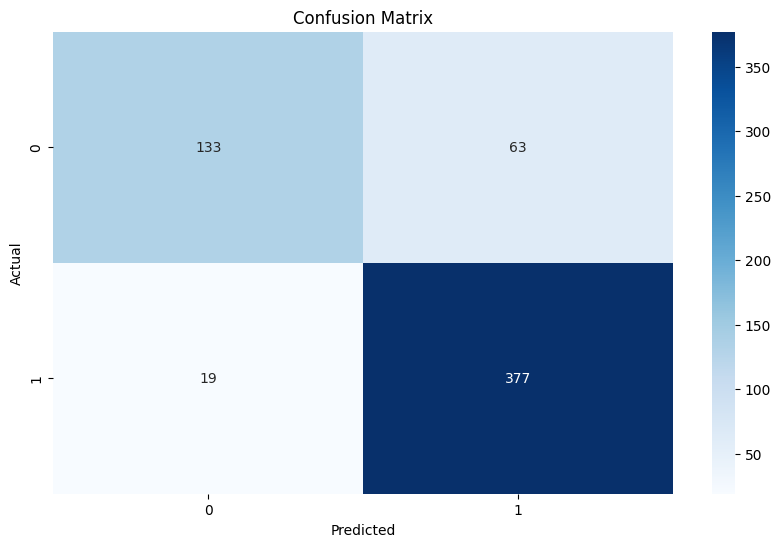

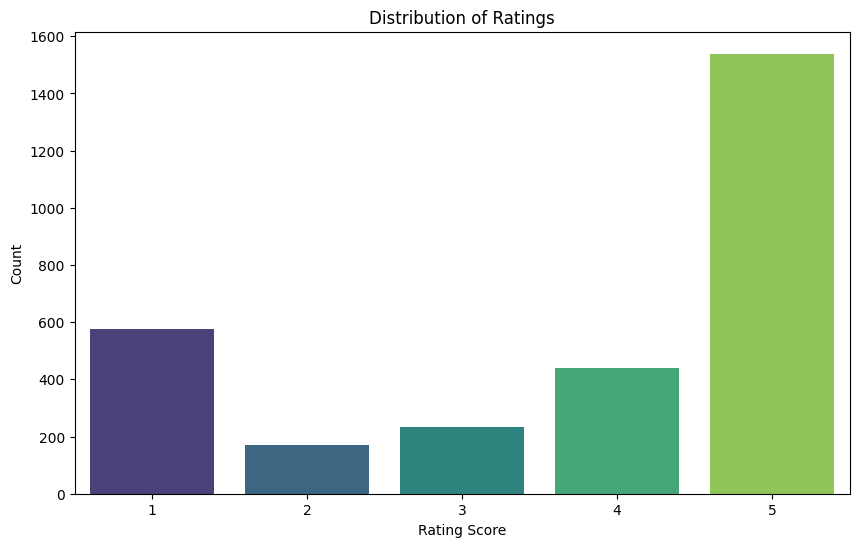

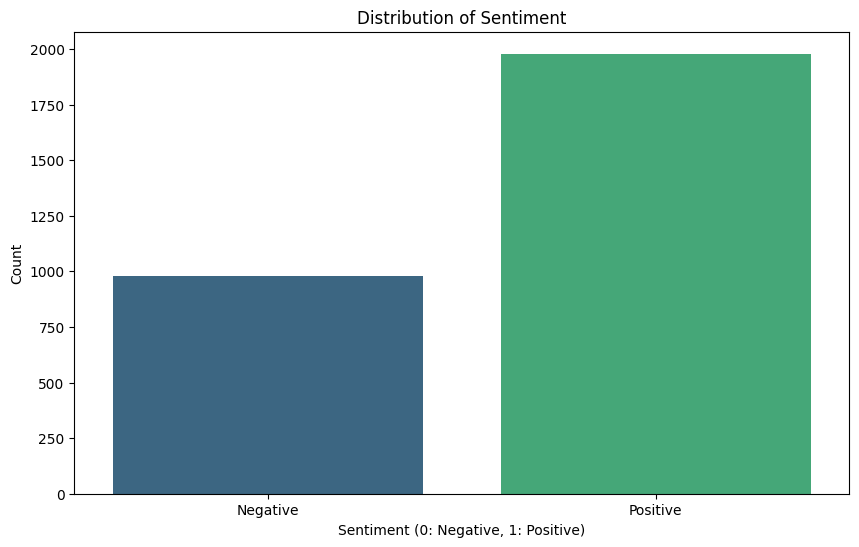

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)  


print("Missing values in each column:")
print(df.isnull().sum())


df.dropna(inplace=True)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(train_df['reviewDescription'])
X_test_vectorized = vectorizer.transform(test_df['reviewDescription'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']


log_reg = LogisticRegression(max_iter=200) 
log_reg.fit(X_train_vectorized, y_train)


test_predictions = log_reg.predict(X_test_vectorized)


accuracy = accuracy_score(y_test, test_predictions)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')


if accuracy < 0.95:
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_vectorized, y_train)
    test_predictions_rf = rf_model.predict(X_test_vectorized)
    
    
    accuracy_rf = accuracy_score(y_test, test_predictions_rf)
    print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
    
    
    if accuracy_rf > accuracy:
        test_predictions = test_predictions_rf
        accuracy = accuracy_rf
        model_used = "Random Forest"
    else:
        model_used = "Logistic Regression"

else:
    model_used = "Logistic Regression"


test_df['predictions'] = test_predictions


print(f'Model Used: {model_used}')
print("Classification Report:")
print(classification_report(y_test, test_predictions))


plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(test_df['sentiment'], test_df['predictions']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ratingScore', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()





Missing values in each column:
productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
sentiment             0
dtype: int64
Logistic Regression Accuracy: 85.47%
Random Forest Accuracy: 86.15%
Support Vector Machine Accuracy: 82.60%
Naive Bayes Accuracy: 85.30%


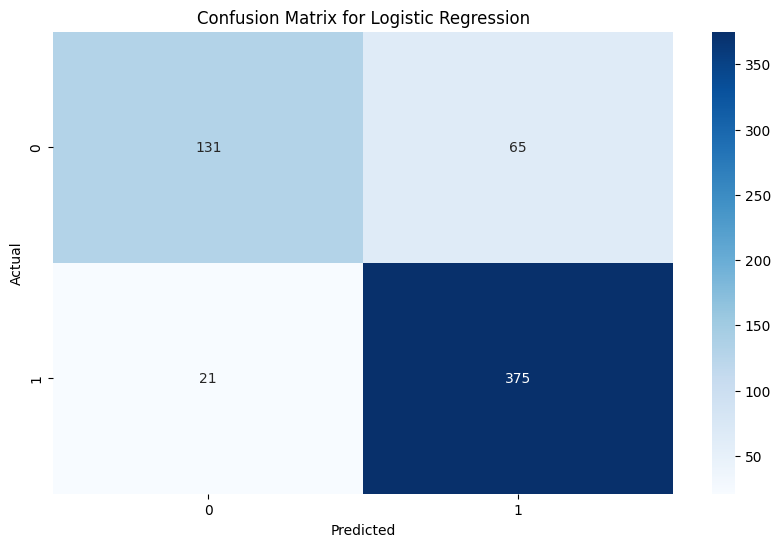

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       196
           1       0.85      0.95      0.90       396

    accuracy                           0.85       592
   macro avg       0.86      0.81      0.83       592
weighted avg       0.86      0.85      0.85       592



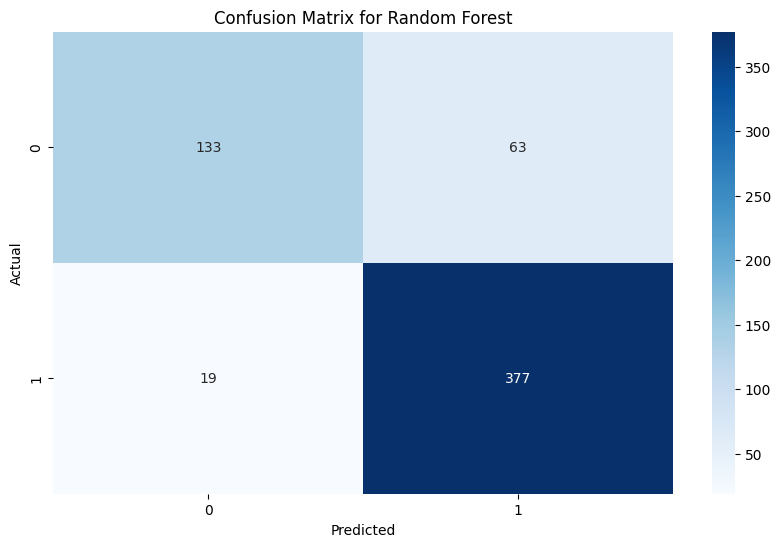

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.68      0.76       196
           1       0.86      0.95      0.90       396

    accuracy                           0.86       592
   macro avg       0.87      0.82      0.83       592
weighted avg       0.86      0.86      0.86       592



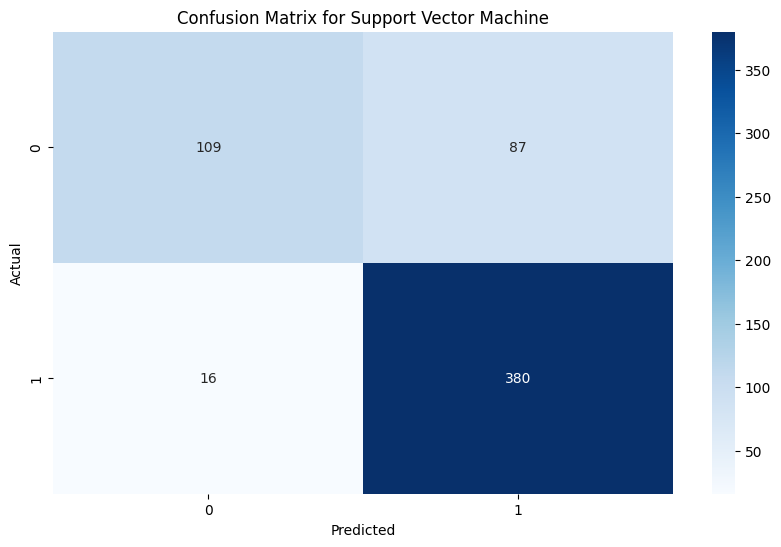

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.87      0.56      0.68       196
           1       0.81      0.96      0.88       396

    accuracy                           0.83       592
   macro avg       0.84      0.76      0.78       592
weighted avg       0.83      0.83      0.81       592



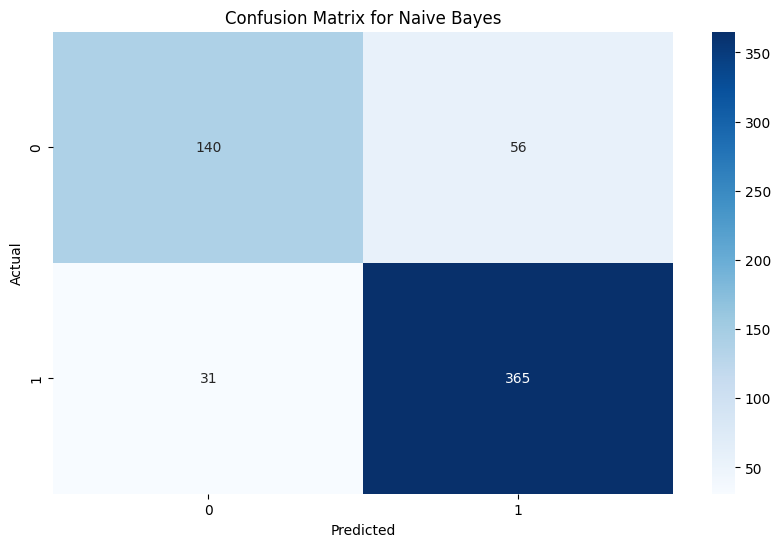

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       196
           1       0.87      0.92      0.89       396

    accuracy                           0.85       592
   macro avg       0.84      0.82      0.83       592
weighted avg       0.85      0.85      0.85       592



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)  


print("Missing values in each column:")
print(df.isnull().sum())


df.dropna(inplace=True)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(train_df['reviewDescription'])
X_test_vectorized = vectorizer.transform(test_df['reviewDescription'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']


models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}


for model_name, model in models.items():
    
    model.fit(X_train_vectorized, y_train)
    
    
    test_predictions = model.predict(X_test_vectorized)
    
    
    accuracy = accuracy_score(y_test, test_predictions)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, test_predictions),
        'confusion_matrix': confusion_matrix(y_test, test_predictions)
    }
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


for model_name, metrics in results.items():
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    print(f"Classification Report for {model_name}:\n{metrics['classification_report']}")


Missing values in each column:
productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64
Missing values after handling:
productAsin          0
country              0
date                 0
isVerified           0
ratingScore          0
reviewTitle          0
reviewDescription    0
reviewUrl            0
reviewedIn           0
variant              0
variantAsin          0
dtype: int64
Logistic Regression Accuracy: 82.87%
Random Forest Accuracy: 82.38%
Support Vector Machine Accuracy: 80.42%
Naive Bayes Accuracy: 82.87%


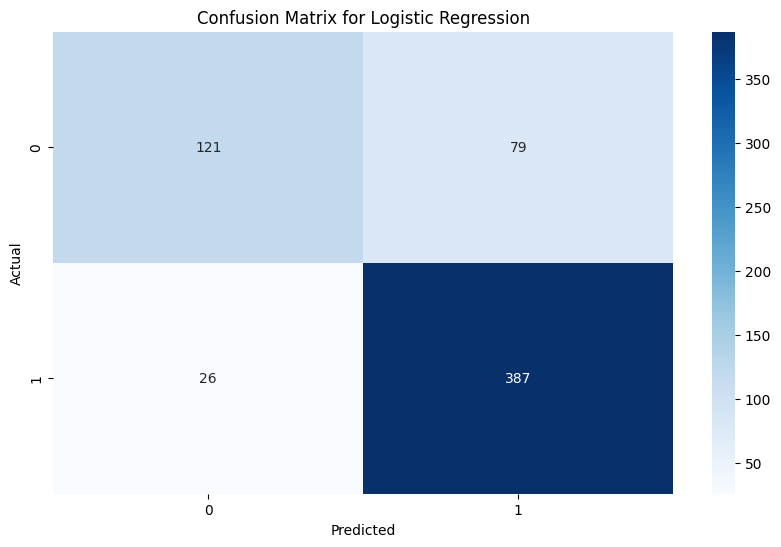

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.60      0.70       200
           1       0.83      0.94      0.88       413

    accuracy                           0.83       613
   macro avg       0.83      0.77      0.79       613
weighted avg       0.83      0.83      0.82       613



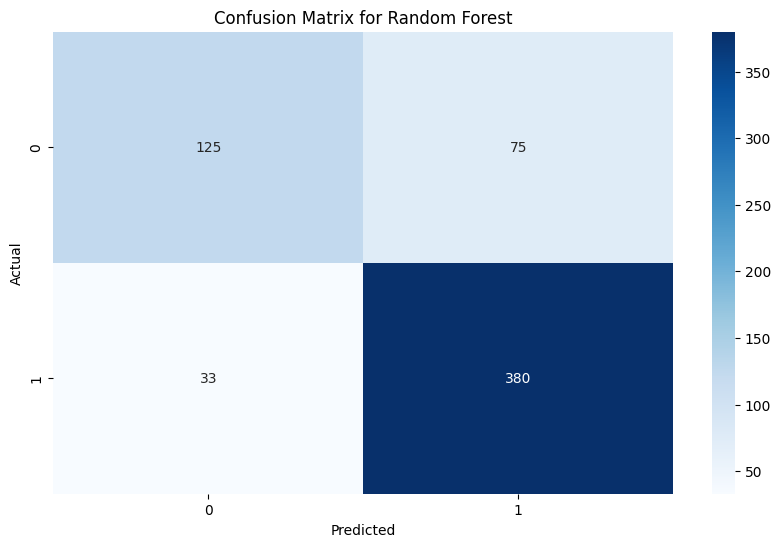

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.62      0.70       200
           1       0.84      0.92      0.88       413

    accuracy                           0.82       613
   macro avg       0.81      0.77      0.79       613
weighted avg       0.82      0.82      0.82       613



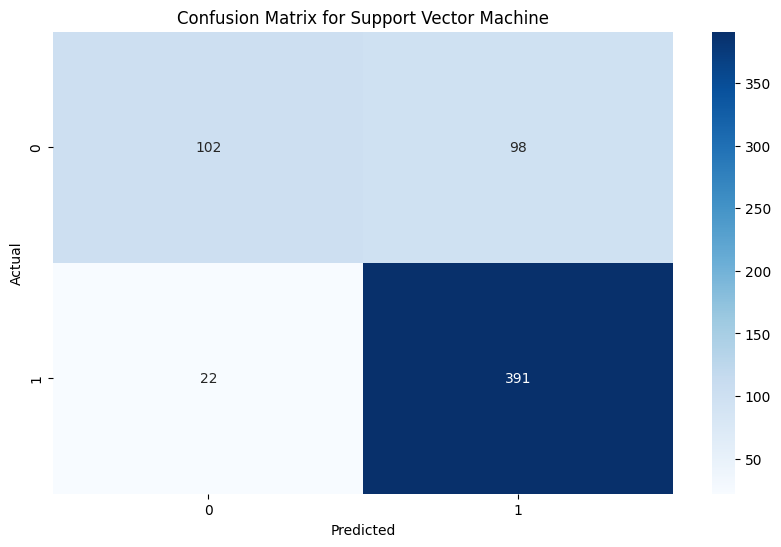

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.82      0.51      0.63       200
           1       0.80      0.95      0.87       413

    accuracy                           0.80       613
   macro avg       0.81      0.73      0.75       613
weighted avg       0.81      0.80      0.79       613



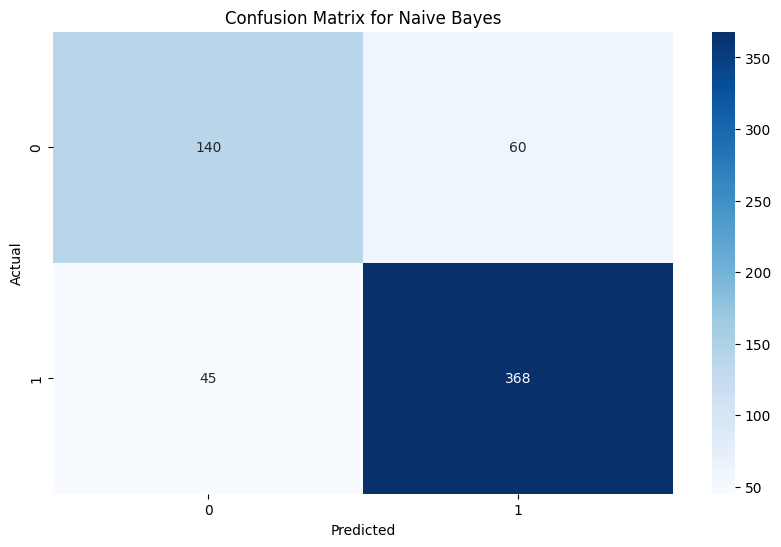

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       200
           1       0.86      0.89      0.88       413

    accuracy                           0.83       613
   macro avg       0.81      0.80      0.80       613
weighted avg       0.83      0.83      0.83       613



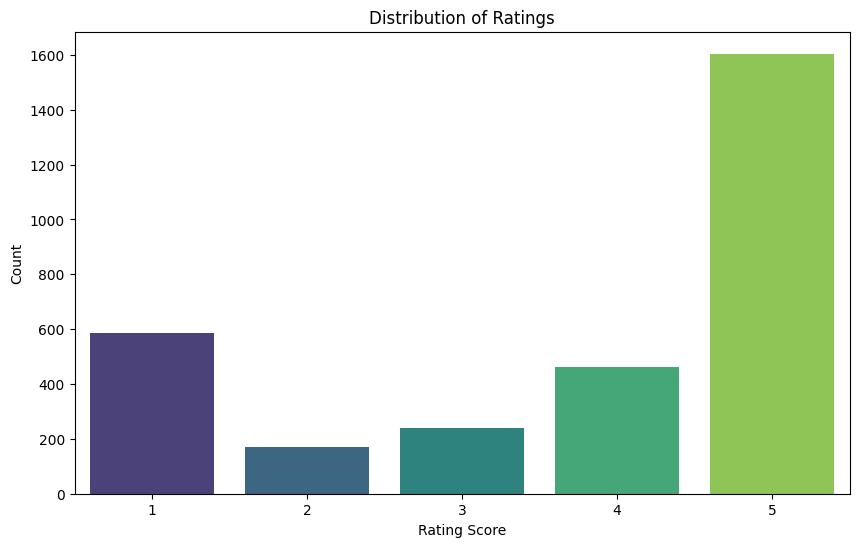

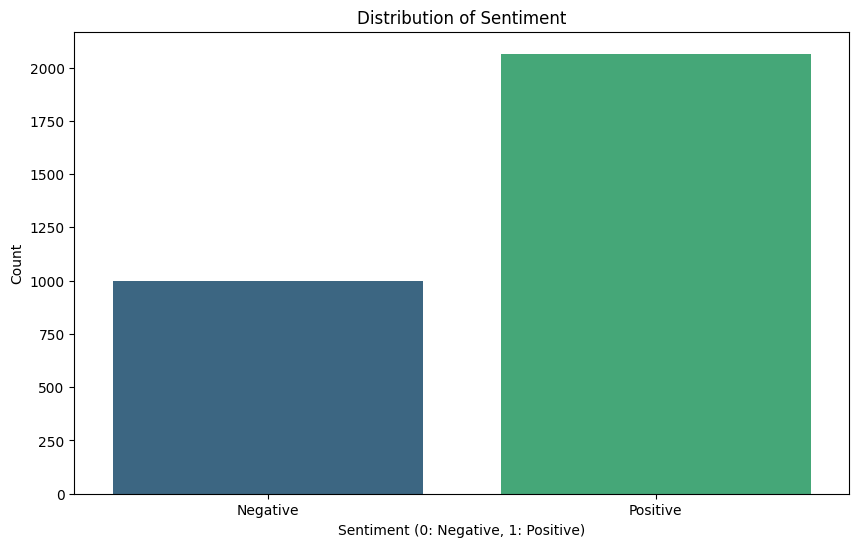

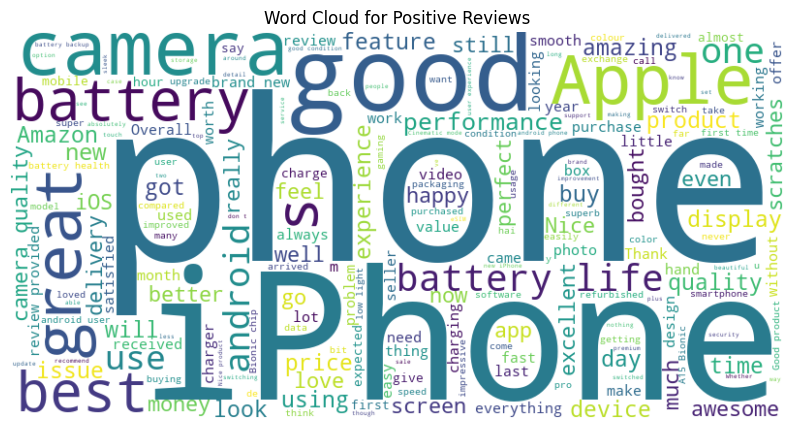

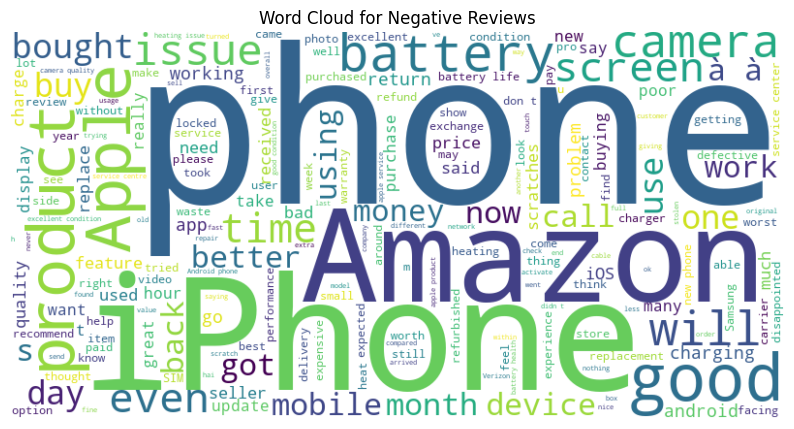

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)


print("Missing values in each column:")
print(df.isnull().sum())


df['reviewUrl'] = df['reviewUrl'].fillna(df['reviewUrl'].mode()[0])


df['reviewDescription'] = df['reviewDescription'].fillna("No review provided")


print("Missing values after handling:")
print(df.isnull().sum())


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(train_df['reviewDescription'])
X_test_vectorized = vectorizer.transform(test_df['reviewDescription'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']


models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}


for model_name, model in models.items():
    
    model.fit(X_train_vectorized, y_train)
    
    
    test_predictions = model.predict(X_test_vectorized)
    
    
    accuracy = accuracy_score(y_test, test_predictions)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, test_predictions),
        'confusion_matrix': confusion_matrix(y_test, test_predictions)
    }
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


for model_name, metrics in results.items():
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
   
    print(f"Classification Report for {model_name}:\n{metrics['classification_report']}")



plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ratingScore', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


positive_reviews = ' '.join(df[df['sentiment'] == 1]['reviewDescription'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


negative_reviews = ' '.join(df[df['sentiment'] == 0]['reviewDescription'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Logistic Regression Accuracy: 84.99%
Random Forest Accuracy: 82.71%
Support Vector Machine Accuracy: 86.30%
Naive Bayes Accuracy: 79.93%


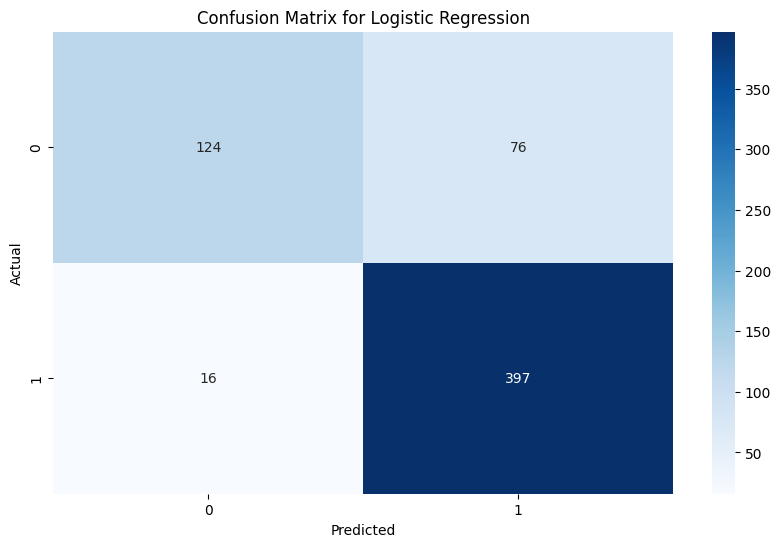

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       200
           1       0.84      0.96      0.90       413

    accuracy                           0.85       613
   macro avg       0.86      0.79      0.81       613
weighted avg       0.85      0.85      0.84       613



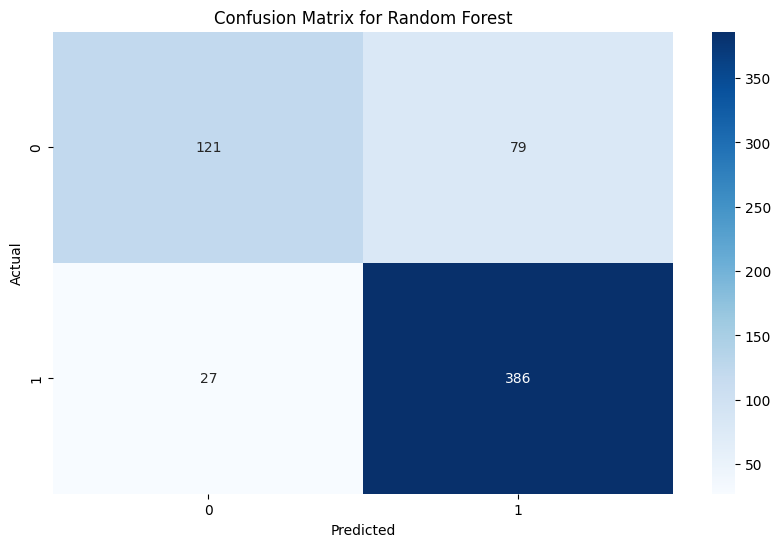

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.60      0.70       200
           1       0.83      0.93      0.88       413

    accuracy                           0.83       613
   macro avg       0.82      0.77      0.79       613
weighted avg       0.83      0.83      0.82       613



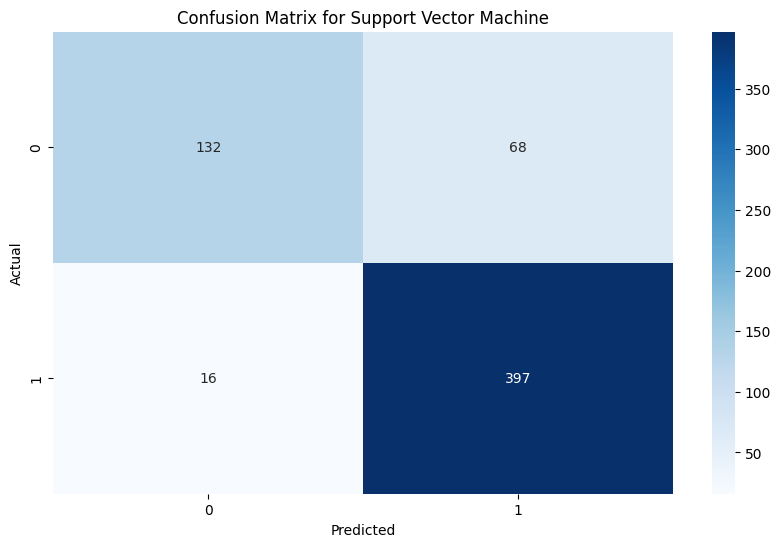

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       200
           1       0.85      0.96      0.90       413

    accuracy                           0.86       613
   macro avg       0.87      0.81      0.83       613
weighted avg       0.87      0.86      0.86       613



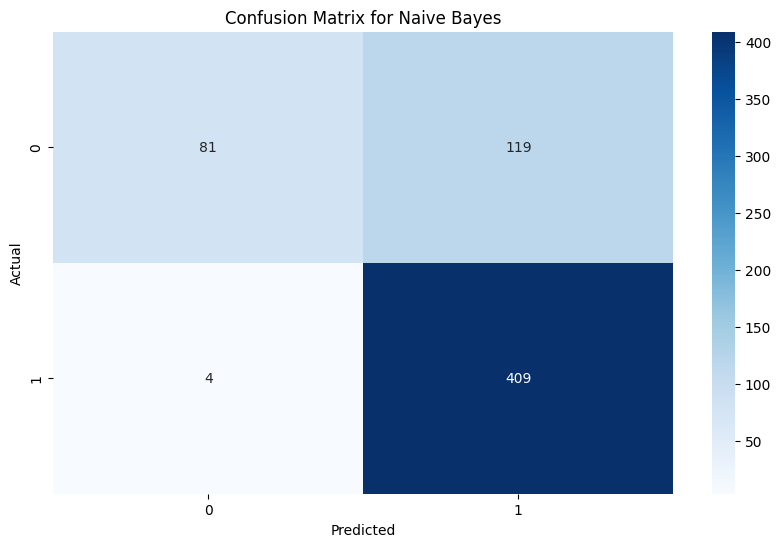

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.41      0.57       200
           1       0.77      0.99      0.87       413

    accuracy                           0.80       613
   macro avg       0.86      0.70      0.72       613
weighted avg       0.83      0.80      0.77       613



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import re
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


data_path = '/kaggle/input/i-phone/iphone.csv' 
df = pd.read_csv(data_path)


df['reviewUrl'] = df['reviewUrl'].fillna(df['reviewUrl'].mode()[0])


df['reviewDescription'] = df['reviewDescription'].fillna("No review provided")


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)


def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text


df['reviewDescription'] = df['reviewDescription'].apply(preprocess_text)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


results = {}

for model_name, model in {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}.items():
    
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),  
        ('classifier', model)
    ])

    
    pipeline.fit(train_df['reviewDescription'], train_df['sentiment'])
    
    
    test_predictions = pipeline.predict(test_df['reviewDescription'])
    
    
    accuracy = accuracy_score(test_df['sentiment'], test_predictions)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(test_df['sentiment'], test_predictions),
        'confusion_matrix': confusion_matrix(test_df['sentiment'], test_predictions)
    }
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')


for model_name, metrics in results.items():
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    print(f"Classification Report for {model_name}:\n{metrics['classification_report']}")




[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression Accuracy: 84.01%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       200
           1       0.83      0.96      0.89       413

    accuracy                           0.84       613
   macro avg       0.86      0.77      0.80       613
weighted avg       0.85      0.84      0.83       613



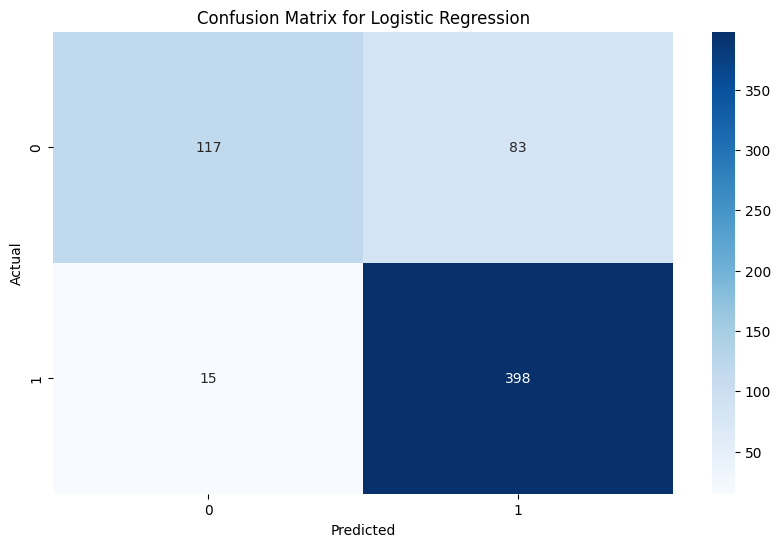

Random Forest Accuracy: 83.52%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       200
           1       0.84      0.93      0.88       413

    accuracy                           0.84       613
   macro avg       0.83      0.78      0.80       613
weighted avg       0.83      0.84      0.83       613



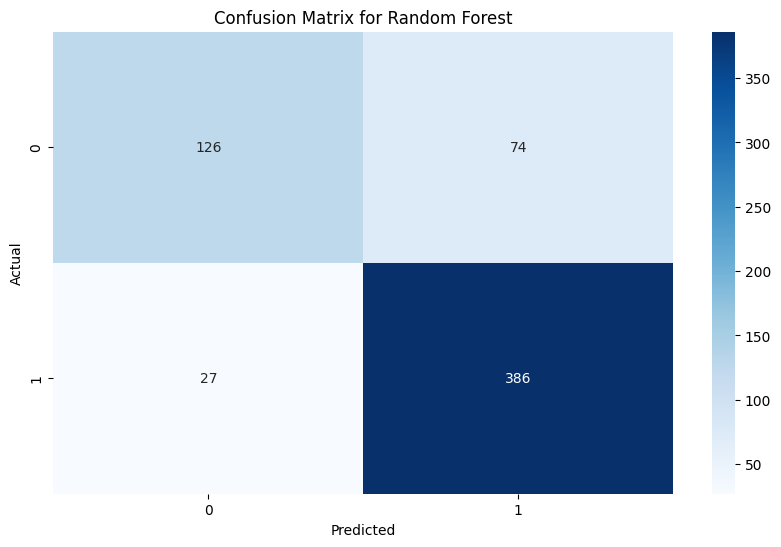

Support Vector Machine Accuracy: 86.62%
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       200
           1       0.88      0.93      0.90       413

    accuracy                           0.87       613
   macro avg       0.86      0.83      0.84       613
weighted avg       0.86      0.87      0.86       613



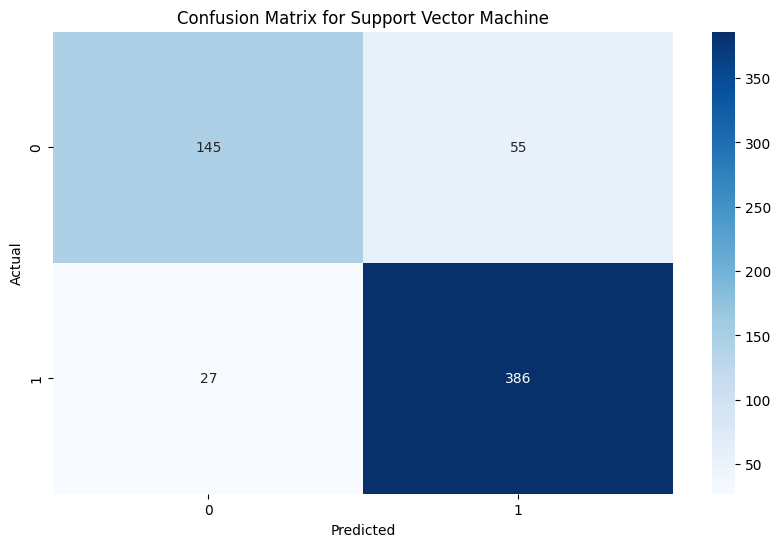

Naive Bayes Accuracy: 83.52%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       200
           1       0.82      0.97      0.89       413

    accuracy                           0.84       613
   macro avg       0.86      0.76      0.79       613
weighted avg       0.85      0.84      0.82       613



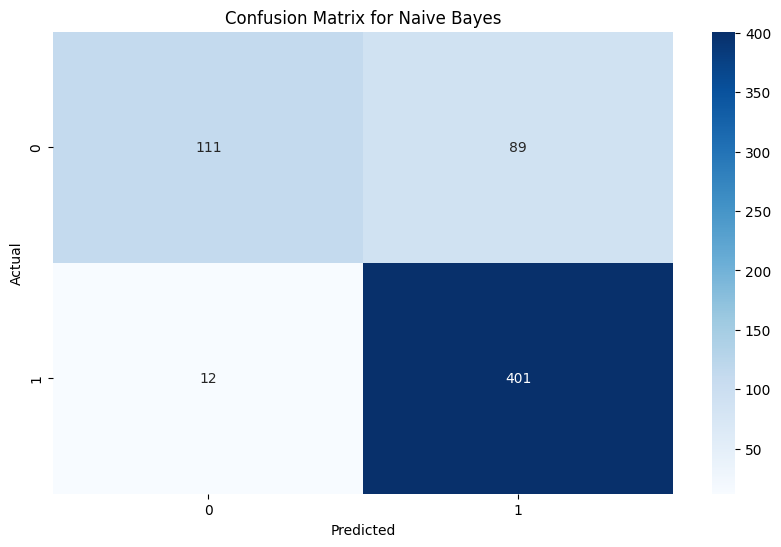

Gradient Boosting Accuracy: 77.00%
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.38      0.52       200
           1       0.76      0.96      0.85       413

    accuracy                           0.77       613
   macro avg       0.79      0.67      0.68       613
weighted avg       0.78      0.77      0.74       613



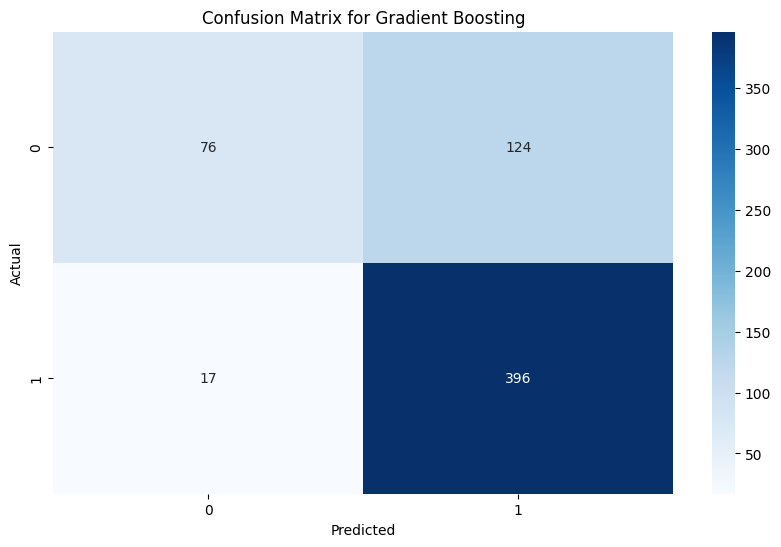

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import re
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)

df['reviewUrl'] = df['reviewUrl'].fillna(df['reviewUrl'].mode()[0])
df['reviewDescription'] = df['reviewDescription'].fillna("No review provided")


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text

df['reviewDescription'] = df['reviewDescription'].apply(preprocess_text)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}


param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),  
        ('classifier', model)
    ])

    if model_name == 'Random Forest':
        grid_search = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(train_df['reviewDescription'], train_df['sentiment'])
        best_model = grid_search.best_estimator_
        results[model_name] = best_model
    elif model_name == 'Support Vector Machine':
        grid_search = GridSearchCV(pipeline, param_grid_svc, cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(train_df['reviewDescription'], train_df['sentiment'])
        best_model = grid_search.best_estimator_
        results[model_name] = best_model
    else:
        pipeline.fit(train_df['reviewDescription'], train_df['sentiment'])
        results[model_name] = pipeline


for model_name, model in results.items():
    test_predictions = model.predict(test_df['reviewDescription'])
    accuracy = accuracy_score(test_df['sentiment'], test_predictions)
    
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')
    print(f'Classification Report for {model_name}:\n{classification_report(test_df["sentiment"], test_predictions)}')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(test_df['sentiment'], test_predictions), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [24]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pandas scikit-learn transformers matplotlib seaborn torch


Note: you may need to restart the kernel to use updated packages.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
10,0.681500
20,0.679000
30,0.673100
40,0.651800
50,0.640300
60,0.620900
70,0.585900
80,0.560200
90,0.532700
100,0.417300


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Accuracy: 89.40%
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       200
           1       0.92      0.92      0.92       413

    accuracy                           0.89       613
   macro avg       0.88      0.88      0.88       613
weighted avg       0.89      0.89      0.89       613



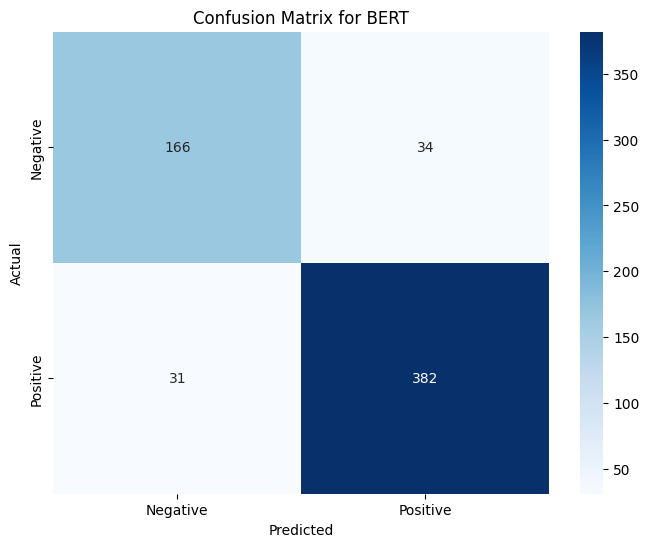

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
import seaborn as sns
import matplotlib.pyplot as plt


data_path = '/kaggle/input/i-phone/iphone.csv'  
df = pd.read_csv(data_path)


df['reviewUrl'] = df['reviewUrl'].fillna(df['reviewUrl'].mode()[0])
df['reviewDescription'] = df['reviewDescription'].fillna("No review provided")


df['sentiment'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_df['reviewDescription'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_df['reviewDescription'].tolist(), truncation=True, padding=True, max_length=512)


class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewsDataset(train_encodings, train_df['sentiment'].tolist())
test_dataset = ReviewsDataset(test_encodings, test_df['sentiment'].tolist())


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=8,   
    per_device_eval_batch_size=8,   
    warmup_steps=500,                 
    weight_decay=0.01,               
    logging_dir='./logs',            
    logging_steps=10,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


trainer.train()


predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)


accuracy = accuracy_score(test_df['sentiment'], preds)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(test_df['sentiment'], preds))


cm = confusion_matrix(test_df['sentiment'], preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for BERT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import pandas as pd


df = pd.read_csv('/kaggle/input/i-phone/iphone.csv')


print(df.columns)


Index(['productAsin', 'country', 'date', 'isVerified', 'ratingScore',
       'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'],
      dtype='object')
